# Análise da diferença salarial para trabalhadores de TI conforme a raça de cada indivíduo.

Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres
com funções trabalhistas de TI distribuídos em qualquer setor produtivo no Brasil, 
conforme a raça de cada indivíduo em um recorte de 2009 e 2019.

## Etapas iniciais para realização das análises:

### Imports necessários para realização dos processamentos e análises:

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [29]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
raca_2009 = {'01': 'Indigena', '02': 'Branca', '04': 'Preta', '06': 'Amarela', '08': 'Parda'}
raca_2019 = {1: 'Indigena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

### Etapa de leitura dos dados das tabelas em CSV para 2009 e 2019:

In [30]:
# Leitura da tabela de dados gerais para 2009:
RAIS_GERAL_2009 = pd.read_csv("../data/DATA_RAIS_GERAL_2009.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2009.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [31]:
# Leitura da tabela de dados gerais para 2019:
RAIS_GERAL_2019 = pd.read_csv("../data/DATA_RAIS_GERAL_2019.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2019.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da coluna de raça para utilização correta:

In [32]:
RAIS_GERAL_2009 = RAIS_GERAL_2009[RAIS_GERAL_2009["Raça"] != '09']
RAIS_GERAL_2009 = RAIS_GERAL_2009[RAIS_GERAL_2009["Raça"] != '{ñ']

RAIS_GERAL_2019 = RAIS_GERAL_2019[RAIS_GERAL_2019["Raça"] != 9]
RAIS_GERAL_2019 = RAIS_GERAL_2019[RAIS_GERAL_2019["Raça"] != 99]

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [33]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2009 (data dos dados para 2009) 
# até 04/2022 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2009 = 2.14068130

RAIS_GERAL_2009["Remuneração"] = RAIS_GERAL_2009["Remuneração"] * fator_correcao_inflacao_2009

# Índice de correção de inflação para o período de 12/2019 (data dos dados para 2019) 
# até 04/2022 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2019 = 1.22858430

RAIS_GERAL_2019["Remuneração"] = RAIS_GERAL_2019["Remuneração"] * fator_correcao_inflacao_2019

### Exibição das tabelas gerais para cada ano:

In [34]:
# Exibindo os cinco primeiros dados da tabela de 2009:
RAIS_GERAL_2009.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,AC,317205,73114,2,21,02,"1,498.48",1
1,AC,317205,73114,2,29,02,"2,140.68",1
2,AC,317205,47717,2,33,02,"2,140.68",1
3,AC,212420,47512,4,29,08,"2,354.75",1
4,AC,142530,47814,6,32,08,"1,806.35",1


In [35]:
# Exibindo os cinco primeiros dados da tabela de 2009:
RAIS_GERAL_2019.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,212405,72100,1,20,8,"2,554.23",1
1,MS,212405,10996,1,37,2,"2,242.77",1
2,MS,317210,84116,2,27,8,"1,626.51",1
3,MS,212415,47440,3,35,8,"5,580.60",1
5,MS,317205,10520,3,41,2,"2,441.14",1


## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme a raça de cada indivíduo:

### Criação das tabelas para relatório e tabela para formação do gráfico:

In [36]:
# Tabela principal para quantidade em 2009:
RAIS_GERAL_2009_QNT = pd.crosstab(RAIS_GERAL_2009["Raça"].replace(raca_2009), RAIS_GERAL_2009["Sexo"].replace(sexo))
RAIS_GERAL_2009_QNT.insert(1, "% Fem.", RAIS_GERAL_2009_QNT["Fem."] / (RAIS_GERAL_2009_QNT["Fem."] + RAIS_GERAL_2009_QNT["Masc."]) * 100)
RAIS_GERAL_2009_QNT.insert(3, "% Masc.", RAIS_GERAL_2009_QNT["Masc."] / (RAIS_GERAL_2009_QNT["Fem."] + RAIS_GERAL_2009_QNT["Masc."]) * 100)

RAIS_GERAL_2009_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
Raça,,,,
Amarela,2154,33.36,4303,66.64
Branca,52928,21.53,192852,78.47
Indigena,118,19.67,482,80.33
Parda,13597,23.02,45465,76.98
Preta,1522,20.22,6007,79.78


In [37]:
# Tabela principal para quantidade em 2019:
RAIS_GERAL_2019_QNT = pd.crosstab(RAIS_GERAL_2019["Raça"].replace(raca_2019), RAIS_GERAL_2019["Sexo"].replace(sexo))
RAIS_GERAL_2019_QNT.insert(1, "% Fem.", RAIS_GERAL_2019_QNT["Fem."] / (RAIS_GERAL_2019_QNT["Fem."] + RAIS_GERAL_2019_QNT["Masc."]) * 100)
RAIS_GERAL_2019_QNT.insert(3, "% Masc.", RAIS_GERAL_2019_QNT["Masc."] / (RAIS_GERAL_2019_QNT["Fem."] + RAIS_GERAL_2019_QNT["Masc."]) * 100)

RAIS_GERAL_2019_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
Raça,,,,
Amarela,1919,25.79,5523,74.21
Branca,63280,19.84,255724,80.16
Indigena,184,20.13,730,79.87
Parda,22805,18.79,98558,81.21
Preta,3518,19.44,14575,80.56


In [38]:
# Tabela para gráfico da quantidade em 2009:
RAIS_GERAL_2009_QNT.insert(4, "Total", RAIS_GERAL_2009_QNT["% Masc."] + RAIS_GERAL_2009_QNT["% Fem."])
RAIS_GERAL_2009_QNT.insert(5, "Ano", "2009")

# Tabela para gráfico da quantidade em 2019:
RAIS_GERAL_2019_QNT.insert(4, "Total", RAIS_GERAL_2019_QNT["% Masc."] + RAIS_GERAL_2019_QNT["% Fem."])
RAIS_GERAL_2019_QNT.insert(5, "Ano", "2019")

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2009_QNT, RAIS_GERAL_2019_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:

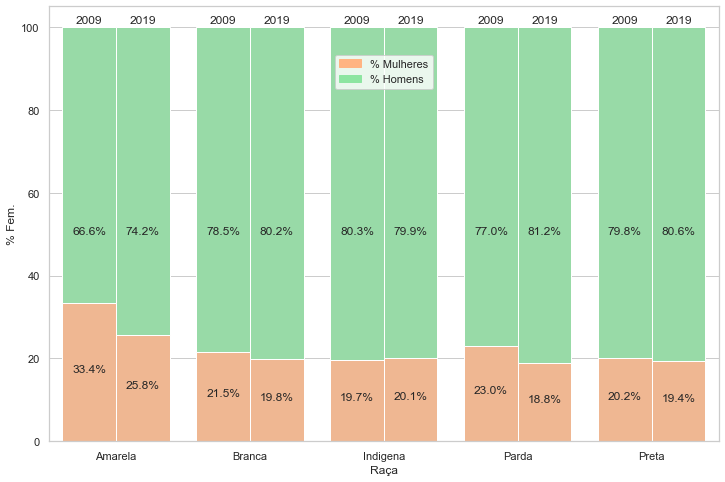

In [39]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize = (12, 8))

# Configuração da grid da imagem:
sns.set(style = "whitegrid")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x = "Raça", y = "Total", hue = "Ano", data = RAIS_GERAL_QNT_GRAF, palette = {"2009": color_masc,"2019": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."][i]), (x, y), ha='center')

# Escrita do valor do ano para cada barra em dupla:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+1
    bar1.annotate('{}'.format(RAIS_GERAL_QNT_GRAF["Ano"][i]), (x, y), ha='center')

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x = "Raça", y = "% Fem.", hue = "Ano", data = RAIS_GERAL_QNT_GRAF, palette = {"2009": color_fem, "2019": color_fem})

# Captura das barras recém criadas:
patches = bar2.patches[10:]

# Escrita da porcentagem para cada barra capturada das mulheres:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar2.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Fem."][i]), (x, y), ha='center')

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color = color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color = color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc = 'center', bbox_to_anchor = (.45, .8, .1, .1))

plt.savefig("./figures/svg/qnt_sexo_raca.svg")

## Análise das médias salariais e diferenças:

### Distribuição da remuneração para cada sexo cruzado pela raça:

In [40]:
# Criação da tabela para o boxplot para 2009
RAIS_GERAL_2009_BOX = RAIS_GERAL_2009
RAIS_GERAL_2009_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2009_BOX["Raça"].replace(raca_2009, inplace = True)

RAIS_GERAL_2009_BOX

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,AC,317205,73114,2,21,Branca,"1,498.48",Masc.
1,AC,317205,73114,2,29,Branca,"2,140.68",Masc.
2,AC,317205,47717,2,33,Branca,"2,140.68",Masc.
3,AC,212420,47512,4,29,Parda,"2,354.75",Masc.
4,AC,142530,47814,6,32,Parda,"1,806.35",Masc.
...,...,...,...,...,...,...,...,...
393907,TO,212405,36006,9,26,Parda,"8,023.19",Fem.
393910,TO,212410,94120,9,26,Branca,"3,228.08",Fem.
393934,TO,212405,45111,9,23,Branca,"2,183.49",Fem.
393935,TO,317110,49302,9,39,Branca,"3,403.92",Fem.


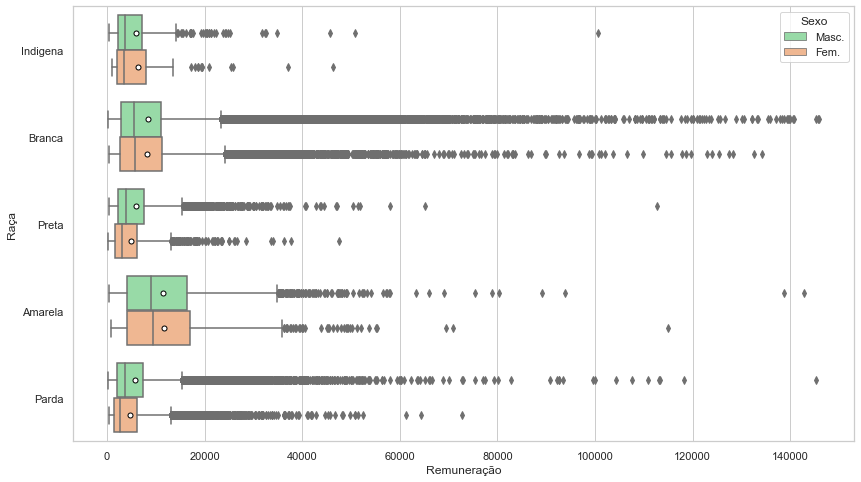

In [41]:
# Criação do boxplot para 2009:
box = sns.boxplot(x = 'Remuneração', y = 'Raça', hue = 'Sexo', data = RAIS_GERAL_2009_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = raca_2009.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_raca_2009.png", dpi = 300)

In [42]:
# Criação da tabela para o boxplot para 2019
RAIS_GERAL_2019_BOX = RAIS_GERAL_2019
RAIS_GERAL_2019_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2019_BOX["Raça"].replace(raca_2019, inplace = True)

RAIS_GERAL_2019_BOX

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,212405,72100,1,20,Parda,"2,554.23",Masc.
1,MS,212405,10996,1,37,Branca,"2,242.77",Masc.
2,MS,317210,84116,2,27,Parda,"1,626.51",Masc.
3,MS,212415,47440,3,35,Parda,"5,580.60",Masc.
5,MS,317205,10520,3,41,Branca,"2,441.14",Masc.
...,...,...,...,...,...,...,...,...
584672,RS,212420,62040,11,35,Branca,"8,288.25",Fem.
584673,RS,212420,62040,11,26,Branca,"10,189.93",Fem.
584676,RS,317210,62015,11,32,Parda,"4,354.83",Fem.
584677,RS,317205,62015,11,54,Branca,"3,089.42",Fem.


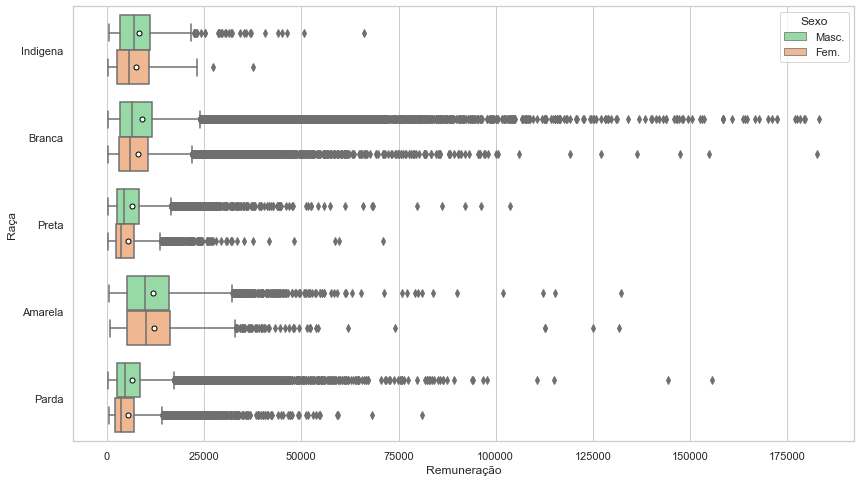

In [43]:
# Criação do boxplot para 2019:
box = sns.boxplot(x = 'Remuneração', y = 'Raça', hue = 'Sexo', data = RAIS_GERAL_2019_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = raca_2019.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_raca_2019.png", dpi = 300)

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:

In [44]:
# Tabela principal para média e diferença salarial em 2009:
RAIS_GERAL_2009_MEDIA = pd.crosstab(RAIS_GERAL_2009["Raça"].replace(raca_2009), RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2009_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2009_MEDIA["Fem."] - RAIS_GERAL_2009_MEDIA["Masc."]) / RAIS_GERAL_2009_MEDIA["Masc."]) * 100)

RAIS_GERAL_2009_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Amarela,"11,634.11","11,572.81",0.53
Branca,"8,238.54","8,447.28",-2.47
Indigena,"6,304.57","6,001.44",5.05
Parda,"4,746.04","5,752.82",-17.50
Preta,"4,839.70","5,925.18",-18.32


In [45]:
# Tabela principal para média e diferença salarial em 2019:
RAIS_GERAL_2019_MEDIA = pd.crosstab(RAIS_GERAL_2019["Raça"].replace(raca_2019), RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2019.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2019_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2019_MEDIA["Fem."] - RAIS_GERAL_2019_MEDIA["Masc."]) / RAIS_GERAL_2019_MEDIA["Masc."]) * 100)

RAIS_GERAL_2019_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Amarela,"12,011.20","11,862.10",1.26
Branca,"8,077.85","8,906.83",-9.31
Indigena,"7,449.44","8,316.80",-10.43
Parda,"5,420.69","6,443.93",-15.88
Preta,"5,351.40","6,316.57",-15.28


In [46]:
RAIS_GERAL_2009_MEDIA.insert(3, "Ano", "2009")

RAIS_GERAL_2019_MEDIA.insert(3, "Ano", "2019")

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2009_MEDIA, RAIS_GERAL_2019_MEDIA]).reset_index()

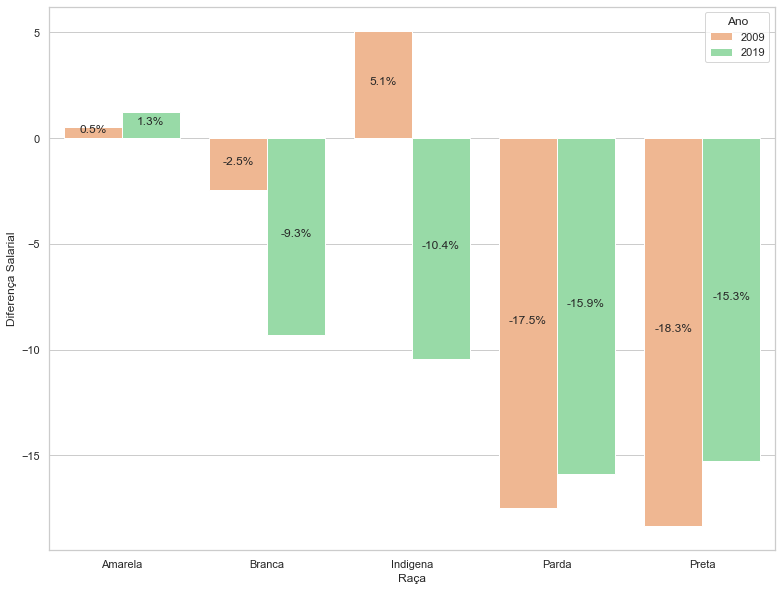

In [47]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Raça", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2009": color_fem,"2019": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("./figures/svg/dif_salarial_sexo_raca_media.svg")

In [48]:
# Tabela principal para mediana e diferença salarial em 2009:
RAIS_GERAL_2009_MEDIANA = pd.crosstab(RAIS_GERAL_2009["Raça"].replace(raca_2009), RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'median')
RAIS_GERAL_2009_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2009_MEDIANA["Fem."] - RAIS_GERAL_2009_MEDIANA["Masc."]) / RAIS_GERAL_2009_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2009_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Amarela,"9,388.64","9,068.74",3.53
Branca,"5,737.37","5,605.46",2.35
Indigena,"3,393.49","3,769.84",-9.98
Parda,"2,766.62","3,673.41",-24.69
Preta,"2,996.46","3,835.72",-21.88


In [49]:
# Tabela principal para mediana e diferença salarial em 2019:
RAIS_GERAL_2019_MEDIANA = pd.crosstab(RAIS_GERAL_2019["Raça"].replace(raca_2019), RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2019.Remuneração, aggfunc = 'median')
RAIS_GERAL_2019_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2019_MEDIANA["Fem."] - RAIS_GERAL_2019_MEDIANA["Masc."]) / RAIS_GERAL_2019_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2019_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Amarela,"10,087.17","9,712.81",3.85
Branca,"5,783.91","6,457.64",-10.43
Indigena,"5,540.27","6,858.39",-19.22
Parda,"3,684.66","4,510.35",-18.31
Preta,"3,676.51","4,453.34",-17.44


In [50]:
RAIS_GERAL_2009_MEDIANA.insert(3, "Ano", "2009")

RAIS_GERAL_2019_MEDIANA.insert(3, "Ano", "2019")

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2009_MEDIANA, RAIS_GERAL_2019_MEDIANA]).reset_index()

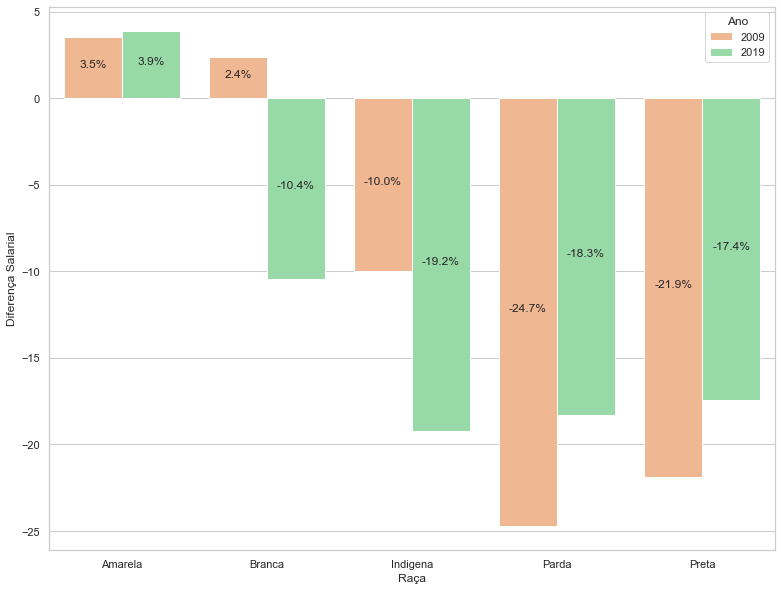

In [51]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Raça", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2009": color_fem,"2019": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("./figures/svg/dif_salarial_sexo_raca_mediana.svg")

### Teste de hipótese para cada grupo de médias por CBOs: RESOLVER

In [52]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [53]:
TESTE_HIP_2009 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for raca in raca_2009:
    df1 = RAIS_GERAL_2009.query("Sexo == 'Masc.'").replace(raca_2009).query("Raça == '{}'".format(raca_2009[raca])).Remuneração
    df2 = RAIS_GERAL_2009.query("Sexo == 'Fem.'").replace(raca_2009).query("Raça == '{}'".format(raca_2009[raca])).Remuneração

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2009.loc[raca_2009[raca]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2009_HIP = pd.merge(RAIS_GERAL_2009_MEDIA, TESTE_HIP_2009, left_index=True, right_index=True)
RAIS_GERAL_2009_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2009_HIP.head(7)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Amarela,"11,634.11","11,572.81",4542260.5,0.01 > 0.09617...,Medianas estatisticamente iguais
Branca,"8,238.54","8,447.28",5155683621.5,0.01 > 0.99984...,Medianas estatisticamente iguais
Indigena,"6,304.57","6,001.44",27721.0,0.01 > 0.33559...,Medianas estatisticamente iguais
Parda,"4,746.04","5,752.82",261516987.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
Preta,"4,839.70","5,925.18",3870259.5,0.01 > 0.00000...,Medianas estatisticamente diferentes


In [54]:
TESTE_HIP_2019 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for raca in raca_2009:
    df1 = RAIS_GERAL_2019.query("Sexo == 'Masc.'").replace(raca_2009).query("Raça == '{}'".format(raca_2009[raca])).Remuneração
    df2 = RAIS_GERAL_2019.query("Sexo == 'Fem.'").replace(raca_2009).query("Raça == '{}'".format(raca_2009[raca])).Remuneração
    
    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2019.loc[raca_2009[raca]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2019_HIP = pd.merge(RAIS_GERAL_2019_MEDIA, TESTE_HIP_2019, left_index=True, right_index=True)
RAIS_GERAL_2019_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2019_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2019_HIP.head(7)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Amarela,"12,011.20","11,862.10",5233227.0,0.01 > 0.20750...,Medianas estatisticamente iguais
Branca,"8,077.85","8,906.83",7519868824.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
Indigena,"7,449.44","8,316.80",61008.5,0.01 > 0.02730...,Medianas estatisticamente iguais
Parda,"5,420.69","6,443.93",970727512.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
Preta,"5,351.40","6,316.57",22230808.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
